In [2]:
import numpy as np
import math as math

import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange

import re

import random
import pickle,pprint

from scipy.stats import gamma
from scipy.optimize import minimize

from matplotlib import rc

%matplotlib inline

In [3]:
rc('text', usetex=True)

# this is just to have figure with large fontsize
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


plt.rc('font', weight='bold')
plt.rc('xtick.major', size=5, pad=7)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)


# GAMMA
    

### Survival, ISI density , hazard rate

In [4]:
def S(t,gamma,beta):
    return 1-sc.special.gammainc(gamma,beta*t)

def S_sum(t,gamma,beta):
    summ=0
    for i in range(gamma):
        summ+=(beta*t)**i/math.factorial(i)

    return summ*np.exp(-beta*t)

def P(t,gamma,beta):
    return (beta**gamma)*(t**(gamma-1))*np.exp(-beta*t)/sc.special.gamma(gamma)

#def RHO(t,a,b):
#    return P(t,a,b)/S(t,a,b)

def RHO(t,gamma,beta):
    summ=0
    for i in range(gamma):
        summ+=(beta*t)**i/math.factorial(i)
    
    return beta**gamma*t**(gamma-1)/(summ*math.factorial(gamma-1))


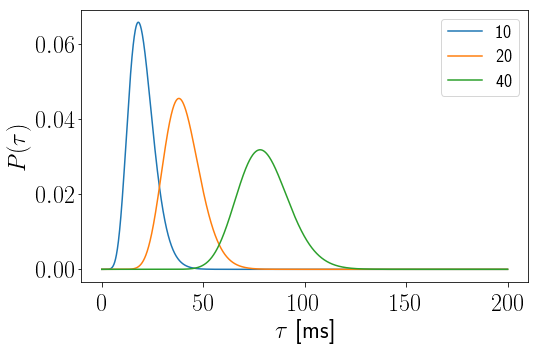

In [5]:
beta0=0.5
dt=0.1
t_max=200
N_sim=int(t_max/dt)
tsim=[i*dt for i in range(N_sim)]

P_vec_10=[P(t,10,beta0) for t in tsim]
P_vec_20=[P(t,20,beta0) for t in tsim]
P_vec_40=[P(t,40,beta0) for t in tsim]

plt.plot(tsim,P_vec_10,label='10')
plt.plot(tsim,P_vec_20,label='20')
plt.plot(tsim,P_vec_40,label='40')
plt.ylabel(r'$P(\tau)$')
plt.xlabel(r'$\tau$ [ms]')
plt.legend()

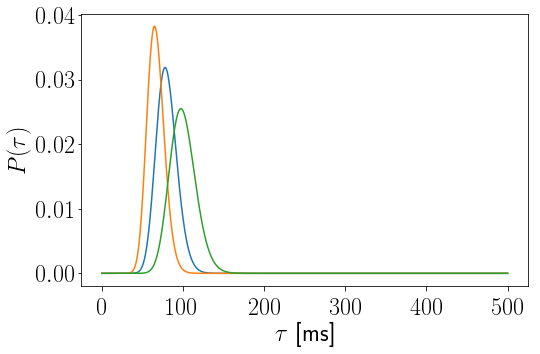

In [6]:
gamma=40
dt=0.1
t_max=500
N_sim=int(t_max/dt)
tsim=[i*dt for i in range(N_sim)]

P_vec_1=[P(t,gamma,0.5) for t in tsim]
P_vec_2=[P(t,gamma,0.6) for t in tsim]
P_vec_3=[P(t,gamma,0.4) for t in tsim]

plt.plot(tsim,P_vec_1,label='0.5')
plt.plot(tsim,P_vec_2,label='0.6')
plt.plot(tsim,P_vec_3,label='0.4')
plt.ylabel(r'$P(\tau)$')
plt.xlabel(r'$\tau$ [ms]')

In [7]:
dt=0.1
t_max=300
N_sim=int(t_max/dt)
tsim=[i*dt for i in range(N_sim)]

gamma=10
beta0=0.02*gamma

In [8]:
S_vec=[S(t,gamma,beta0) for t in tsim]
S_sumv=[S_sum(t,gamma,beta0) for t in tsim]
P_vec=[P(t,gamma,beta0) for t in tsim]
RHO_vec=[RHO(t,gamma,beta0) for t in tsim]

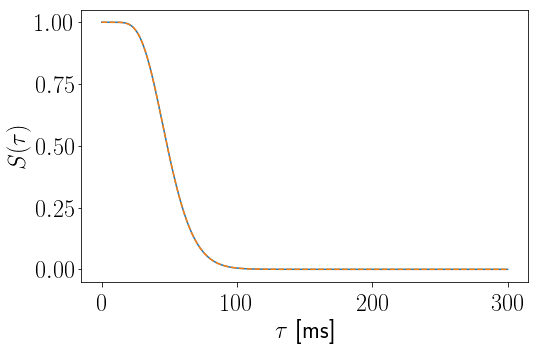

In [9]:
plt.plot(tsim,S_vec)
plt.plot(tsim,S_sumv,ls='--')
plt.ylabel(r'$S(\tau)$')
plt.xlabel(r'$\tau$ [ms]')

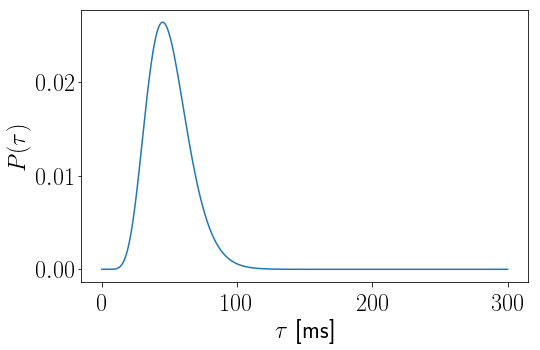

In [10]:
plt.plot(tsim,P_vec)
plt.ylabel(r'$P(\tau)$')
plt.xlabel(r'$\tau$ [ms]')

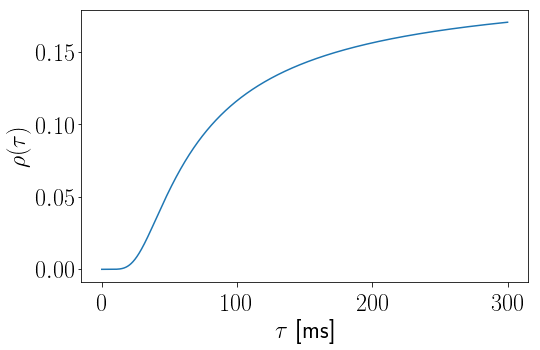

In [11]:
plt.plot(tsim,RHO_vec)
plt.ylabel(r'$\rho(\tau)$')
plt.xlabel(r'$\tau$ [ms]')

In [12]:
def sum_exp(gamma,n,m):
    summ=0
    for i in range(gamma):
        summ+=i*np.exp(2*np.pi*1j*(n-m)*i/gamma)
    return summ

In [13]:
def phih(h,beta0,kappa,h_0):
    return beta0*np.exp(kappa*(h-h_0))

In [14]:
def eigenvalue(n,gamma,beta):
    return beta*(np.exp(2*np.pi*1j*n/gamma)-1)

def phi_0(n,gamma,beta):
    return beta*np.exp(2*np.pi*1j*n/gamma)/gamma
    

In [15]:
def Cnm(n,m,kappa):
    return kappa*(1-np.exp(-2*np.pi*1j*n/gamma))*(1+sum_exp(gamma,n,m)/gamma)

In [16]:
def KLM(h,X,Y,beta0,kappa,h_0,tau_m,t):
    beta=phih(h,beta0,kappa,h_0)
    
    hpoint=1/tau_m*(-h+mu(t))
    
    alpha_r=beta*(np.cos(2*np.pi/gamma)-1)
    alpha_i=beta*np.sin(2*np.pi/gamma)
    beta_r=(gamma+1)*np.sin(np.pi/gamma)**2
    beta_i=(gamma+1)*np.sin(np.pi/gamma)*np.cos(np.pi/gamma)
    gamma_r=0.5
    gamma_i=0.5*np.tan(np.pi/gamma)
    eta_r=1
    #eta_i=0
   
    K=(alpha_r+(beta_r+gamma_r)*hpoint)*X-(alpha_i+(beta_i-gamma_i)*hpoint)*Y+eta_r*hpoint
    L=(alpha_r+(beta_r-gamma_r)*hpoint)*Y+(alpha_i+(beta_i+gamma_i)*hpoint)*X
    M=1/tau_m*(-h+mu(t))

    return K,L,M


def KLMs(h,X,Y,beta0,kappa,h_0,tau_m,t):
    beta=phih(h,beta0,kappa,h_0)
    l1=eigenvalue(1,gamma,beta)
    
    hpoint=1/tau_m*(-h+mu(t))
    
   
    

    K=l1.real*X-l1.imag*Y
    L=l1.imag*X+l1.real*Y
    M=1/tau_m*(-h+mu(t))


    return K,L,M

In [17]:
#PARAMETERS:
#SIMULATION PARAMETERS

dt=0.1
t_max=400
N_sim=int(t_max/dt)
tsim=[i*dt for i in range(N_sim)]

#----------------------------------------------------------

#NEURON PARAMETER:

gamma=25
tau_m=15 #ms
#----------------------------------------------------------

#RECOVERY FUNCTION PARAMETERS Phi(h)=nu_max*exp(beta(h-h0)):

kappa=1 #mv^(-1)
beta0=0.02*gamma #kHZ : firing rate for h=h_0 
h_0=0 #mV
#----------------------------------------------------------



#EXTERNAL INPUT:  mu(t)=mu_1+epsilon*sin(omega*t)
#different frequency trials
fr_vec=np.logspace(-3,-1,5) #KHz
omega_vec=2*np.pi*fr_vec #kHz  

#different epsilon trials
epsilon_vec=np.copy([1])# 5  #mV

#baseline of the external input 
mu_1=h_0 #mV 
#----------------------------------------------------------

tau_max=400
N=int(tau_max/dt)
tau_vec=[i*dt for i in range(N+1)]
S_init=[S_sum(tau,gamma,beta0) for tau in tau_vec]

#TO STORE THE ACTIVITY and the external INPUT:

mu_Matrix  =np.zeros((len(omega_vec),len(epsilon_vec),N_sim))
A_Matrix   =np.zeros((len(omega_vec),len(epsilon_vec),N_sim))
A_int_Matrix   =np.zeros((len(omega_vec),len(epsilon_vec),N_sim))
As_Matrix   =np.zeros((len(omega_vec),len(epsilon_vec),N_sim))
#----------------------------------------------------------

In [38]:
for i_o, omega in enumerate(omega_vec):
    for i_e, epsilon in enumerate(epsilon_vec):
        print(i_o, i_e)


        def mu(t):
            return mu_1 - epsilon * np.sin(omega * t)


        # H PARMETER
        H = np.zeros((N_sim + 1, 1))
        H[0] = h_0

        A = np.zeros((N_sim, 1))
        A[0] = phih(H[0], beta0, kappa, h_0) / gamma

        X = np.zeros((N_sim + 1, 1))  # X in the thesis
        Y = np.zeros((N_sim + 1, 1))  # Y in the thesis
        
        
        Hs = np.zeros((N_sim + 1, 1))
        Hs[0] = h_0

        As = np.zeros((N_sim, 1))
        As[0] = phih(H[0], beta0, kappa, h_0) / gamma

        Xs = np.zeros((N_sim + 1, 1))  # X in the thesis
        Ys = np.zeros((N_sim + 1, 1))  # Y in the thesis

        # INTEGRAL:
        """q_old = beta0 / gamma * np.copy(S_init)
        A_int = np.zeros((N_sim, 1))

        q_new = beta0 / gamma * np.copy(S_init)

        h_int = np.zeros((N_sim + 1, 1))
        h_int[0] = h_0"""

        for i in range(N_sim - 1):
            t = i * dt

            mu_Matrix[i_o, i_e, i] = mu(t)

            # INTEGRAL
            """
            A_int[i] = q_new[0]
            q_new = np.zeros((N + 1, 1))
            hpoint = 1 / tau_m * (-h_int[i] + mu(t))
            h_int[i + 1] = h_int[i] + dt * hpoint
            beta_int = phih(h_int[i + 1], beta0, kappa, h_0)[0]

            for ir in range(N):
                rho_ = RHO(ir * dt, gamma, beta_int)
                q_new[ir + 1] = q_old[ir] * (1 - dt * rho_)
                q_new[0] += dt * rho_ * q_old[ir]

                #if q_old[ir] == 0:
                #   break

            q_new /= (np.sum(q_new * dt))
            q_old = q_new"""
            # ___END INTEGRAL______




            K1, L1, M1 = KLM(H[i], X[i], Y[i], beta0, kappa, h_0, tau_m, t)
            K2, L2, M2 = KLM(H[i] + 0.5 * dt * M1, X[i] + 0.5 * dt * K1, Y[i] + 0.5 * dt * L1, beta0, kappa, h_0, tau_m,
                             t)
            K3, L3, M3 = KLM(H[i] + 0.5 * dt * M2, X[i] + 0.5 * dt * K2, Y[i] + 0.5 * dt * L2, beta0, kappa, h_0, tau_m,
                             t)
            K4, L4, M4 = KLM(H[i] + dt * M3, X[i] + dt * K3, Y[i] + dt * L3, beta0, kappa, h_0, tau_m, t)

            X[i + 1] = X[i] + dt / 6 * (K1 + 2 * K2 + 2 * K3 + K4)
            Y[i + 1] = Y[i] + dt / 6 * (L1 + 2 * L2 + 2 * L3 + L4)
            H[i + 1] = H[i] + dt / 6 * (M1 + 2 * M2 + 2 * M3 + M4)
            
            
            K1s, L1s, M1s = KLMs(Hs[i], Xs[i], Ys[i], beta0, kappa, h_0, tau_m, t)
            K2s, L2s, M2s = KLMs(Hs[i] + 0.5 * dt * M1s, Xs[i] + 0.5 * dt * K1s, Ys[i] + 0.5 * dt * L1s, beta0, kappa, h_0, tau_m,
                             t)
            K3s, L3s, M3s = KLMs(Hs[i] + 0.5 * dt * M2s, Xs[i] + 0.5 * dt * K2s, Ys[i] + 0.5 * dt * L2s, beta0, kappa, h_0, tau_m,
                             t)
            K4s, L4s, M4s = KLMs(Hs[i] + dt * M3s, Xs[i] + dt * K3s, Ys[i] + dt * L3s, beta0, kappa, h_0, tau_m, t)

            Xs[i + 1] = Xs[i] + dt / 6 * (K1s + 2 * K2s + 2 * K3s + K4s)
            Ys[i + 1] = Ys[i] + dt / 6 * (L1s + 2 * L2s + 2 * L3s + L4s)
            Hs[i + 1] = Hs[i] + dt / 6 * (M1s + 2 * M2s + 2 * M3s + M4s)

            A[i + 1] = phih(H[i + 1], beta0, kappa, h_0) / gamma * (
            1 + X[i + 1] * np.cos(2 * np.pi / gamma) - Y[i + 1] * np.sin(2 * np.pi / gamma))
            
            As[i + 1] = phih(Hs[i + 1], beta0, kappa, h_0) / gamma * (
            1 + Xs[i + 1] * np.cos(2 * np.pi / gamma) - Ys[i + 1] * np.sin(2 * np.pi / gamma))

        A_Matrix[i_o, i_e, :] = A.flatten()
        As_Matrix[i_o, i_e, :] = As.flatten()
        #A_int_Matrix[i_o, i_e, :] = A_int.flatten()


0 0
1 0
2 0
3 0
4 0


In [21]:
#TEST NAIVE A(t)=beta/gamma

A_test_Matrix   =np.zeros((len(omega_vec),len(epsilon_vec),N_sim))

for i_o, omega in enumerate(omega_vec):
    for i_e, epsilon in enumerate(epsilon_vec):
        print(i_o, i_e)
        
        h_int = np.zeros((N_sim + 1, 1))
        h_int[0] = h_0


        def mu(t):
            return mu_1 - epsilon * np.sin(omega * t)


        for i in range(N_sim - 1):
            t = i * dt

            mu_Matrix[i_o, i_e, i] = mu(t)

            # INTEGRAL
            
            
           
            hpoint = 1 / tau_m * (-h_int[i] + mu(t))
            h_int[i + 1] = h_int[i] + dt * hpoint
            beta_int = phih(h_int[i + 1], beta0, kappa, h_0)[0]
            A_test_Matrix[i_o, i_e,i+1] = beta_int/gamma



0 0
1 0
2 0
3 0
4 0


In [18]:
pkl_file = open('omega_searchgamma25.pkl', 'rb')

search  = pickle.load(pkl_file)

pkl_file.close()

mu_1=search['mu_1']
A_Matrix=search['A_Matrix']
A_int_Matrix=search['A_int_Matrix']
As_Matrix=search['As_Matrix']
tsim=search['tsim']
epsilon_vec=search['epsilon_vec']
omega_vec=search['omega_vec']
fr_vec=search['fr_vec']
mu_Matrix=search['mu_Matrix']


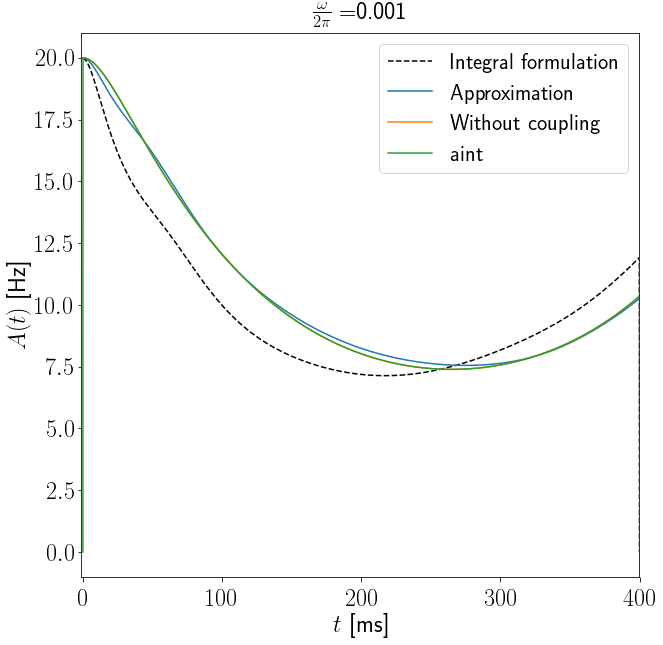

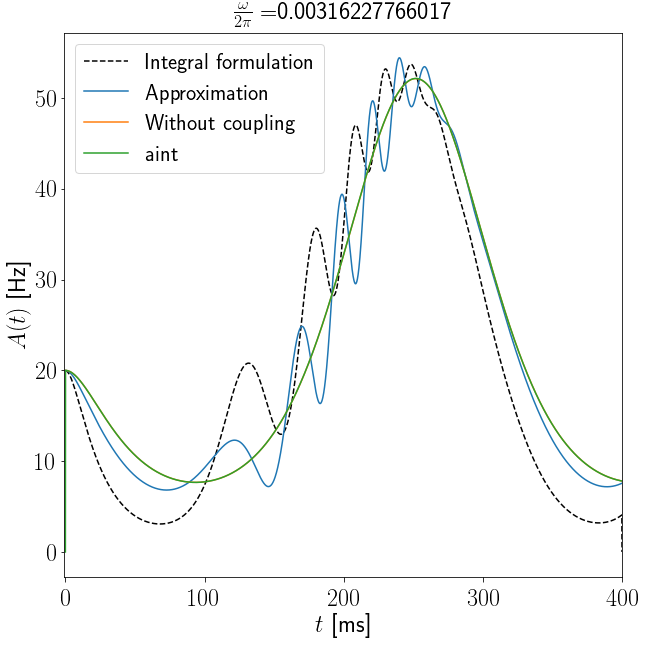

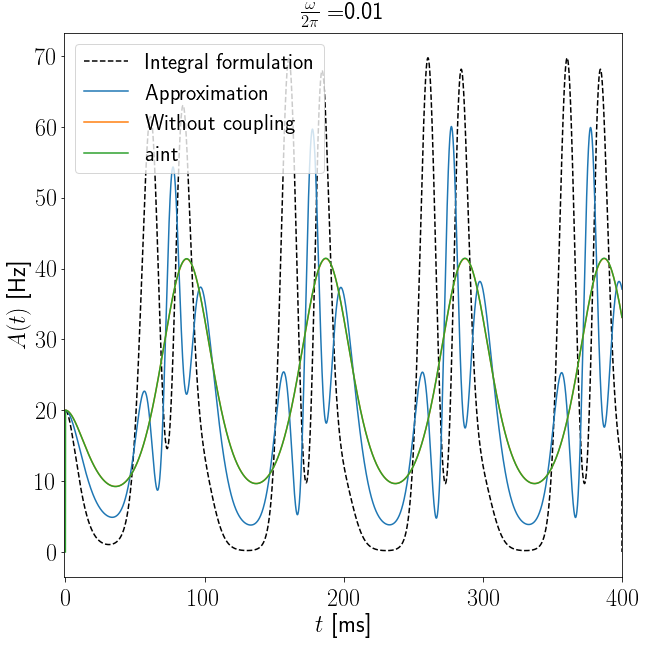

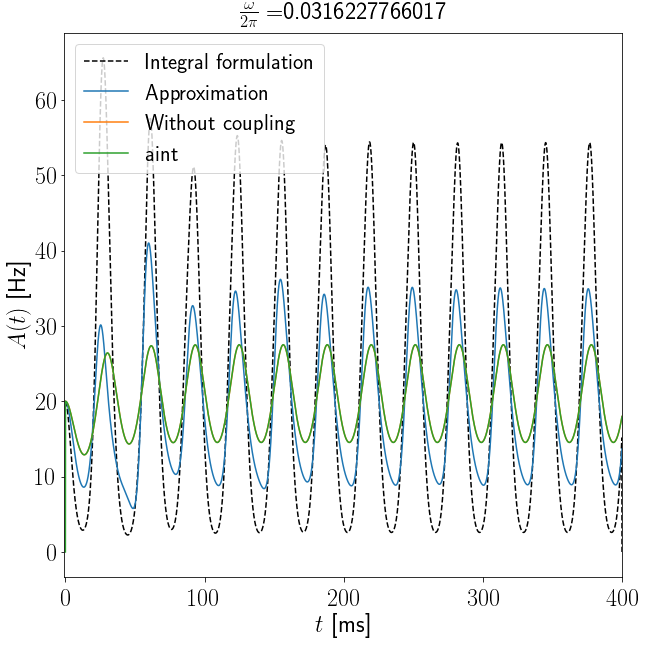

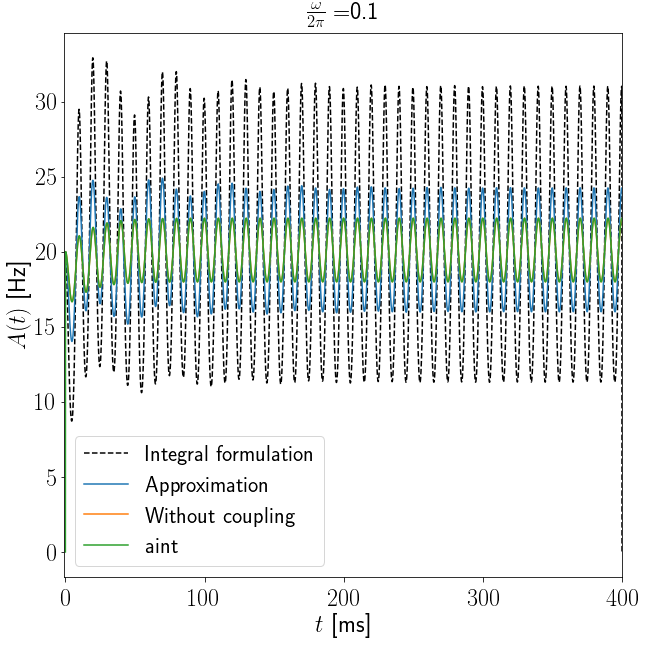

In [22]:
i_e=0
for i_o,fr in enumerate(fr_vec):
    plt.figure(figsize=(10,10))
    
    plt.plot(tsim,1000*A_int_Matrix[i_o,i_e,:],label='Integral formulation',ls='--',c='k')
    plt.plot(tsim,1000*A_Matrix[i_o,i_e,:],label='Approximation')
    plt.plot(tsim,1000*As_Matrix[i_o,i_e,:],label='Without coupling')
    plt.plot(tsim,1000*A_test_Matrix[i_o,i_e,:],label='aint')
    plt.title(r'$\frac{\omega}{2\pi}=$'+str(fr))
    plt.legend(fontsize=22)
    plt.ylabel(r'$A(t)$ [Hz]')
    plt.xlabel(r'$t$ [ms]')
    plt.xlim(-1,tsim[-1])





# Step

In [16]:
#PARAMETERS:
#SIMULATION PARAMETERS

dt=0.1
t_max=1000
N_sim=int(t_max/dt)
tsim=[i*dt for i in range(N_sim)]

#----------------------------------------------------------

#NEURON PARAMETER:

gamma=25
tau_m=15 #ms
#----------------------------------------------------------

#RECOVERY FUNCTION PARAMETERS Phi(h)=nu_max*exp(beta(h-h0)):

kappa=1 #mv^(-1)
beta0=0.6 #kHZ : firing rate for h=h_0 
h_0=0 #mV
#----------------------------------------------------------

#coupling coefficient
C11=Cnm(1,1,kappa)
C10=Cnm(1,0,kappa)
C1_1=Cnm(1,-1,kappa)


#EXTERNAL INPUT:  mu(t)=mu_1+epsilon*sin(omega*t)
#different frequency trials
fr_vec=np.logspace(-3,-1,5) #KHz
omega_vec=2*np.pi*fr_vec #kHz  

#different epsilon trials
epsilon_vec=np.copy([1])# 5  #mV

#baseline of the external input 
mu_1=h_0 #mV 
#----------------------------------------------------------

tau_max=400
N=int(tau_max/dt)
tau_vec=[i*dt for i in range(N+1)]
S_init=[S_sum(tau,gamma,beta0) for tau in tau_vec]

In [17]:
def mu(t):
    if t<50:
        return h_0
    
    elif t<400:
        
        return h_0-1
            
    elif t<700:
        return h_0+1
        
    else:
        return h_0



# H PARMETER
H = np.zeros((N_sim + 1, 1))
H[0] = h_0

A = np.zeros((N_sim, 1))
A[0] = phih(H[0], beta0, kappa, h_0) / gamma

X = np.zeros((N_sim + 1, 1))  # X in the thesis
Y = np.zeros((N_sim + 1, 1))  # Y in the thesis

# H PARMETER only
Hs = np.zeros((N_sim + 1, 1))
Hs[0] = h_0

As = np.zeros((N_sim, 1))
As[0] = phih(H[0], beta0, kappa, h_0) / gamma

Xs = np.zeros((N_sim + 1, 1))  # X in the thesis
Ys = np.zeros((N_sim + 1, 1))  # Y in the thesis

# INTEGRAL:
q_old = beta0 / gamma * np.copy(S_init)
A_int = np.zeros((N_sim, 1))

q_new = beta0 / gamma * np.copy(S_init)

h_int = np.zeros((N_sim + 1, 1))
h_int[0] = h_0

for i in range(N_sim - 1):
    if i%100==0:
        print(i/N_sim*100)
    t = i * dt

    mu_Matrix[i_o, i_e, i] = mu(t)

    # INTEGRAL
    
    A_int[i] = q_new[0]
    q_new = np.zeros((N + 1, 1))
    hpoint = 1 / tau_m * (-h_int[i] + mu(t))
    h_int[i + 1] = h_int[i] + dt * hpoint
    beta_int = phih(h_int[i + 1], beta0, kappa, h_0)[0]

    for ir in range(N):
        rho_ = RHO(ir * dt, gamma, beta_int)
        q_new[ir + 1] = q_old[ir] * (1 - dt * rho_)
        q_new[0] += dt * rho_ * q_old[ir]

        #if q_old[ir] == 0:
        #   break

    q_new /= (np.sum(q_new * dt))
    q_old = q_new
    # ___END INTEGRAL______




    K1, L1, M1 = KLM(H[i], X[i], Y[i], beta0, kappa, h_0, tau_m, t)
    K2, L2, M2 = KLM(H[i] + 0.5 * dt * M1, X[i] + 0.5 * dt * K1, Y[i] + 0.5 * dt * L1, beta0, kappa, h_0, tau_m,t)
    K3, L3, M3 = KLM(H[i] + 0.5 * dt * M2, X[i] + 0.5 * dt * K2, Y[i] + 0.5 * dt * L2, beta0, kappa, h_0, tau_m,t)
    K4, L4, M4 = KLM(H[i] + dt * M3, X[i] + dt * K3, Y[i] + dt * L3, beta0, kappa, h_0, tau_m, t)

    X[i + 1] = X[i] + dt / 6 * (K1 + 2 * K2 + 2 * K3 + K4)
    Y[i + 1] = Y[i] + dt / 6 * (L1 + 2 * L2 + 2 * L3 + L4)
    H[i + 1] = H[i] + dt / 6 * (M1 + 2 * M2 + 2 * M3 + M4)

    A[i + 1] = phih(H[i + 1], beta0, kappa, h_0) / gamma *(1 + X[i + 1] * np.cos(2 * np.pi / gamma) - Y[i + 1] * np.sin(2 * np.pi / gamma))

    
    K1s, L1s, M1s = KLMs(Hs[i], Xs[i], Ys[i], beta0, kappa, h_0, tau_m, t)
    K2s, L2s, M2s = KLMs(Hs[i] + 0.5 * dt * M1s, Xs[i] + 0.5 * dt * K1s, Ys[i] + 0.5 * dt * L1s, beta0, kappa, h_0, tau_m,t)
    K3s, L3s, M3s = KLMs(Hs[i] + 0.5 * dt * M2s, Xs[i] + 0.5 * dt * K2s, Ys[i] + 0.5 * dt * L2s, beta0, kappa, h_0, tau_m,t)
    K4s, L4s, M4s = KLMs(Hs[i] + dt * M3s, Xs[i] + dt * K3s, Ys[i] + dt * L3s, beta0, kappa, h_0, tau_m, t)

    Xs[i + 1] = Xs[i] + dt / 6 * (K1s + 2 * K2s + 2 * K3s + K4s)
    Ys[i + 1] = Ys[i] + dt / 6 * (L1s + 2 * L2s + 2 * L3s + L4s)
    Hs[i + 1] = Hs[i] + dt / 6 * (M1s + 2 * M2s + 2 * M3s + M4s)

            
    As[i + 1] = phih(Hs[i + 1], beta0, kappa, h_0) / gamma * (1 + Xs[i + 1] * np.cos(2 * np.pi / gamma) - Ys[i + 1] * np.sin(2 * np.pi / gamma))







0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.000000000000001
8.0
9.0
10.0
11.0
12.0
13.0
14.000000000000002
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.000000000000004
28.999999999999996
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.00000000000001
56.00000000000001
56.99999999999999
57.99999999999999
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0


In [28]:
step_search  = {'mu_Matrix': mu_Matrix,
               'A': A,
                'As': As,
               'A_int': A_int,
               'tsim':tsim
              }

output = open('step.pkl', 'wb')

pickle.dump(step_search, output)

output.close()

In [29]:
pkl_file = open('step_search.pkl', 'rb')

search  = pickle.load(pkl_file)

pkl_file.close()

A=search['A']
A_int=search['A_int']
As=search['As']
tsim=search['tsim']
mu_Matrix=search['mu_Matrix']

FileNotFoundError: [Errno 2] No such file or directory: 'step_search.pkl'

(-1, 999.9000000000001)

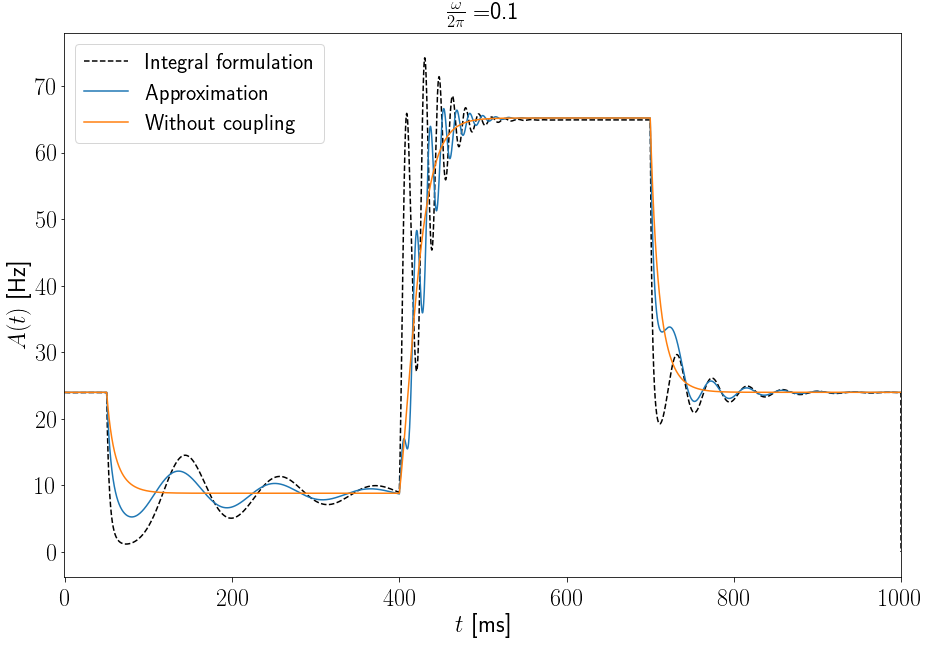

In [30]:
plt.figure(figsize=(15,10))
plt.plot(tsim,1000*A_int,label='Integral formulation',ls='--',c='k')
plt.plot(tsim,1000*A,label='Approximation')
plt.plot(tsim,1000*As,label='Without coupling')
plt.title(r'$\frac{\omega}{2\pi}=$'+str(fr))
plt.legend(fontsize=22)
plt.ylabel(r'$A(t)$ [Hz]')
plt.xlabel(r'$t$ [ms]')
plt.xlim(-1,tsim[-1])

# TEST TO COMPUTE THE COEFFICIENT

In [85]:
def Pi_n(n,gamma):
    return np.exp(2*np.pi*1j*n)

In [99]:
def F(x,m,gamma,beta):
    som_num=0
    som_denom=0
    for a in range(gamma):
        som_num+=(beta*x*Pi_n(a,gamma))**a/math.factorial(a)
        som_denom+=(beta*x)**a/math.factorial(a)
    
    pim=Pi_n(m,gamma)
    
    return pim*np.exp(-beta*pim*x)*(beta*x)**gamma/math.factorial(gamma)*som_num/som_denom
    

In [100]:
gamma=100
beta=0.5
tau_vec=[i for i in range(600)]

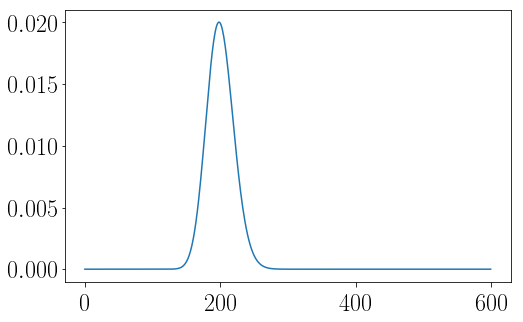

In [101]:
plt.plot(tau_vec,[P(t,gamma,beta) for t in tau_vec])


In [102]:


F_vec0=[F(x,0,gamma,beta) for x in tau_vec]
F_vec1=[F(x,1,gamma,beta) for x in tau_vec]
F_vec_1=[F(x,-1,gamma,beta) for x in tau_vec]
F_vec_1=[F(x,-1,gamma,beta) for x in tau_vec]

In [103]:
F_vec0=np.copy(F_vec0)
F_vec1=np.copy(F_vec1)
F_vec_1=np.copy(F_vec_1)


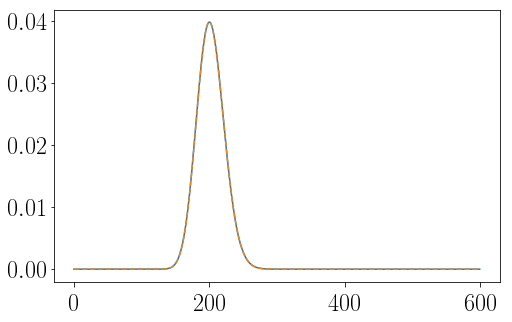

In [104]:
plt.plot(tau_vec,F_vec0.real)
plt.plot(tau_vec,[(1/beta)*P(t,gamma+1,beta) for t in tau_vec],ls='--')

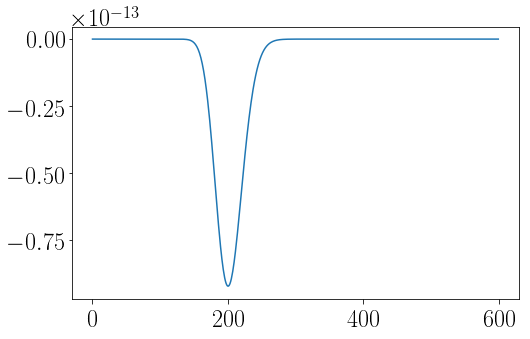

In [105]:

plt.plot(tau_vec,F_vec0.imag)


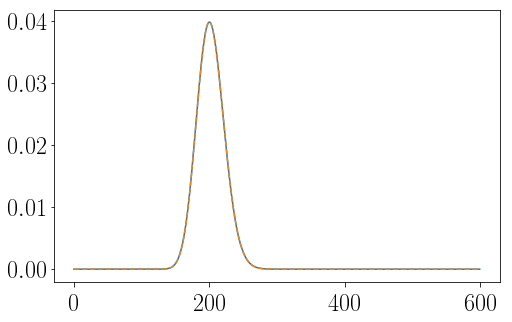

In [106]:
plt.plot(tau_vec,F_vec1.real)
plt.plot(tau_vec,[(1/beta)*P(t,gamma+1,beta) for t in tau_vec],ls='--')

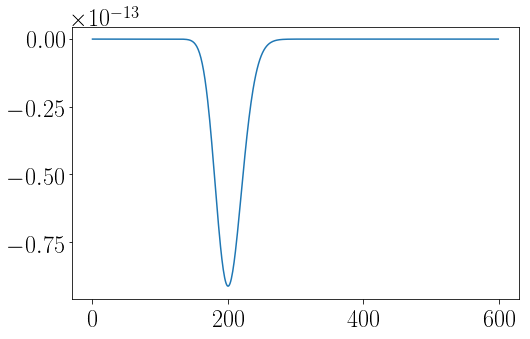

In [107]:
plt.plot(tau_vec,F_vec1.imag)

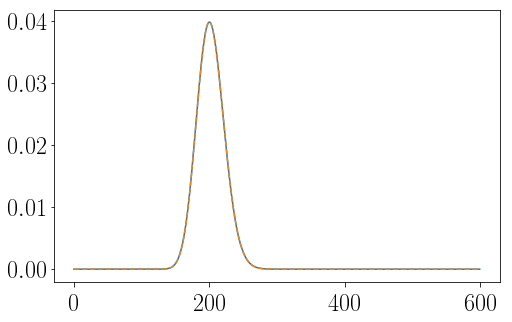

In [108]:
plt.plot(tau_vec,F_vec_1.real)
plt.plot(tau_vec,[(1/beta)*P(t,gamma+1,beta) for t in tau_vec],ls='--')

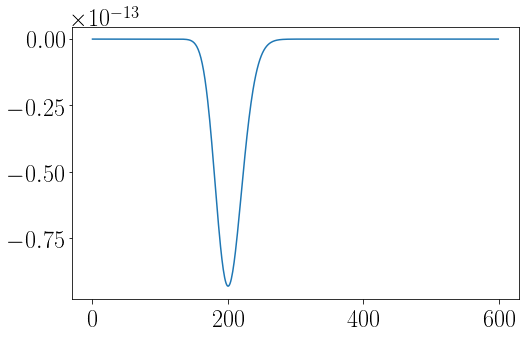

In [109]:
plt.plot(tau_vec,F_vec_1.imag)

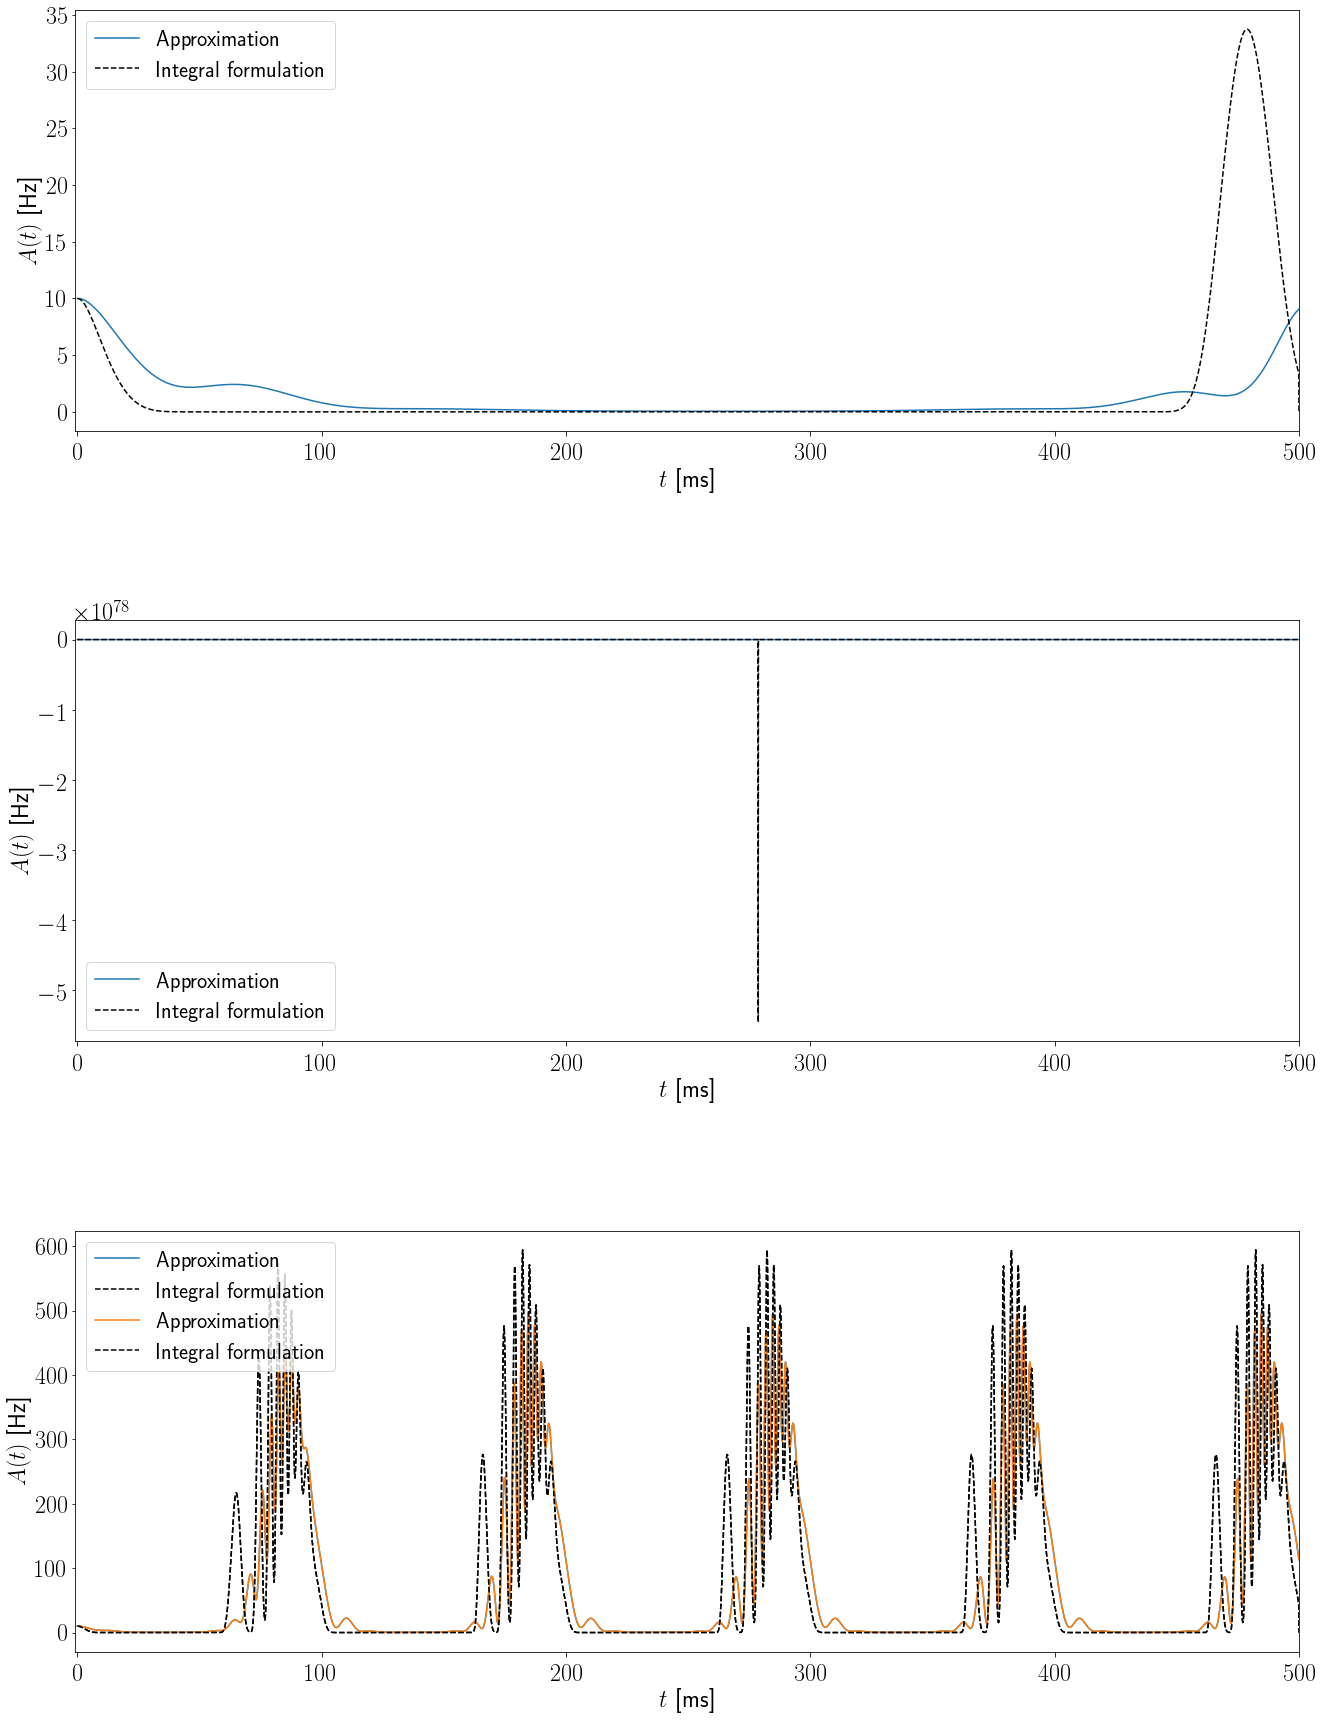

In [10]:
plt.figure(figsize=(20,30))

i_o=0
i_e=0
plt.subplot(311)
plt.plot(tsim,1000*A_Matrix[i_o,i_e,:],label='Approximation')
plt.plot(tsim,1000*A_int_Matrix[i_o,i_e,:],label='Integral formulation',ls='--',c='k')
plt.legend(fontsize=22)
plt.ylabel(r'$A(t)$ [Hz]')
plt.xlabel(r'$t$ [ms]')
plt.xlim(-1,tsim[-1])



plt.subplot(312)
i_o=1
i_e=0
plt.plot(tsim,1000*A_Matrix[i_o,i_e,:],label='Approximation')
plt.plot(tsim,1000*A_int_Matrix[i_o,i_e,:],label='Integral formulation',ls='--',c='k')
plt.legend(fontsize=22)
plt.ylabel(r'$A(t)$ [Hz]')
plt.xlabel(r'$t$ [ms]')
plt.xlim(-1,tsim[-1])



i_o=2
i_e=0

plt.subplot(313)

plt.plot(tsim,1000*A_Matrix[i_o,i_e,:],label='Approximation')
plt.plot(tsim,1000*A_int_Matrix[i_o,i_e,:],label='Integral formulation',ls='--',c='k')
plt.legend(fontsize=22)
plt.ylabel(r'$A(t)$ [Hz]')
plt.xlabel(r'$t$ [ms]')
plt.xlim(-1,tsim[-1])

plt.subplots_adjust(top=0.88, bottom=0.12, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.45)

i_o=2
i_e=0

plt.subplot(313)

plt.plot(tsim,1000*A_Matrix[i_o,i_e,:],label='Approximation')
plt.plot(tsim,1000*A_int_Matrix[i_o,i_e,:],label='Integral formulation',ls='--',c='k')
plt.legend(fontsize=22)
plt.ylabel(r'$A(t)$ [Hz]')
plt.xlabel(r'$t$ [ms]')
plt.xlim(-1,tsim[-1])

plt.subplots_adjust(top=0.88, bottom=0.12, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.45)